# Exploring the NHANES diabetes data

[DSLC stages]: EDA


You can conduct an EDA of the NHANES diabetes dataset in this document.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%run -i 01_cleaning.ipynb
import seaborn as sns
import numpy as np
# 现在可以在02_eda.ipynb中使用01_cleaning.ipynb中定义的变量

训练集大小: (19499, 12)
验证集大小: (6500, 12)
测试集大小: (6500, 12)
数值 0 出现了 17447 次
数值 1 出现了 2052 次
数值 0 出现了 5798 次
数值 1 出现了 702 次
数值 0 出现了 5772 次
数值 1 出现了 728 次


In [10]:
cleaned_data

house_family_person_id  diabetes  age  smoker  sex  \
0                      1_2_1         0   24       1    1   
1                      2_1_1         0   76       1    0   
2                      3_1_2         0   36       1    1   
3                      5_1_1         0   35       0    1   
4                     10_1_5         0   20       1    1   
...                      ...       ...  ...     ...  ...   
32494              71559_1_1         0   56       0    0   
32495              71565_1_1         0   58       0    0   
32496              71569_1_1         1   71       0    1   
32497              71576_1_1         0   64       0    0   
32498              71579_1_1         0   54       1    0   

       coronary_heart_disease  weight   bmi  height  hypertension  \
0                           0     125  2019      66             0   
1                           0     190  2727      70             1   
2                           0     225  3862      64             0   
3                           0     240  3995      65             0   
4                           0     103  1883      62             0   
...                       ...     ...   ...     ...           ...   
32494                       0     172  2399      71             0   
32495                       0     225  3141      71             1   
32496                       1     124  2501      59             1   
32497                       0     188  2945      67             1   
32498                       0     200  2790      71             1   

       heart_condition  cancer  family_history_diabetes  
0                    0       0                        0  
1                    0       0                        0  
2                    0       0                        1  
3                    0       0                        1  
4                    0       0                        1  
...                ...     ...                      ...  
32494                0       1                        1  
32495                0       0                        1  
32496                0       0                        1  
32497                0       0                        0  
32498                0       0                        0  

[28451 rows x 13 columns]

In [11]:
print(cleaned_data.head())

  house_family_person_id  diabetes  age  smoker  sex  coronary_heart_disease  \
0                  1_2_1         0   24       1    1                       0   
1                  2_1_1         0   76       1    0                       0   
2                  3_1_2         0   36       1    1                       0   
3                  5_1_1         0   35       0    1                       0   
4                 10_1_5         0   20       1    1                       0   

   weight   bmi  height  hypertension  heart_condition  cancer  \
0     125  2019      66             0                0       0   
1     190  2727      70             1                0       0   
2     225  3862      64             0                0       0   
3     240  3995      65             0                0       0   
4     103  1883      62             0                0       0   

   family_history_diabetes  
0                        0  
1                        0  
2                        1  
3     

In [12]:
print(cleaned_data.describe())

           diabetes           age        smoker           sex  \
count  28451.000000  28451.000000  28451.000000  28451.000000   
mean       0.101051     49.870163      0.584795      0.537204   
std        0.301401     17.688399      0.492766      0.498623   
min        0.000000     18.000000      0.000000      0.000000   
25%        0.000000     35.000000      0.000000      0.000000   
50%        0.000000     51.000000      1.000000      1.000000   
75%        0.000000     64.000000      1.000000      1.000000   
max        1.000000     84.000000      1.000000      1.000000   

       coronary_heart_disease        weight           bmi        height  \
count            28451.000000  28451.000000  28451.000000  28451.000000   
mean                 0.050578    176.349900   2769.458859     66.825771   
std                  0.219139     39.205485    545.324719      3.898480   
min                  0.000000    100.000000   1522.000000     59.000000   
25%                  0.000000    146.00

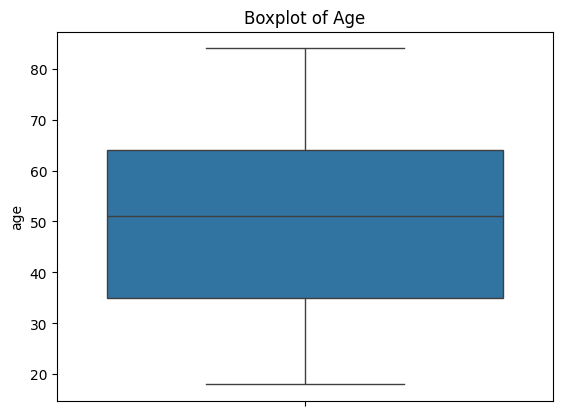

In [13]:
sns.boxplot(y=cleaned_data['age'])
plt.title('Boxplot of Age')
plt.show()

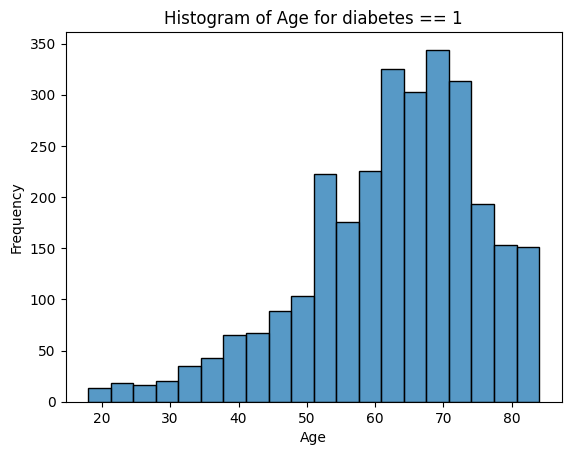

In [14]:
# 筛选出diabetes等于1的数据
data_diabetes_1 = cleaned_data[cleaned_data['diabetes'] == 1]

sns.histplot(data_diabetes_1['age'], bins = 20)
plt.title('Histogram of Age for diabetes == 1')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

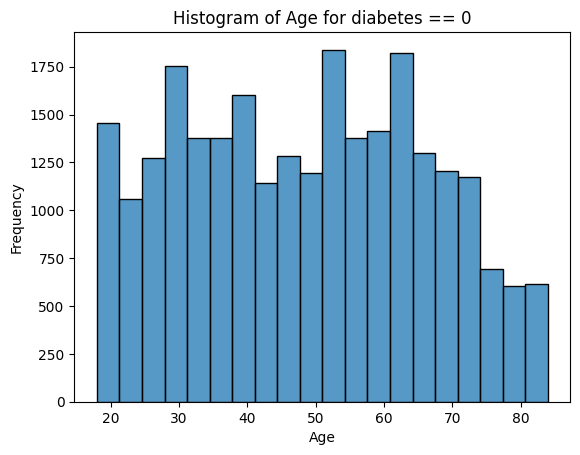

In [15]:
# 筛选出diabetes等于0的数据
data_diabetes_1 = cleaned_data[cleaned_data['diabetes'] == 0]

sns.histplot(data_diabetes_1['age'], bins = 20)
plt.title('Histogram of Age for diabetes == 0')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

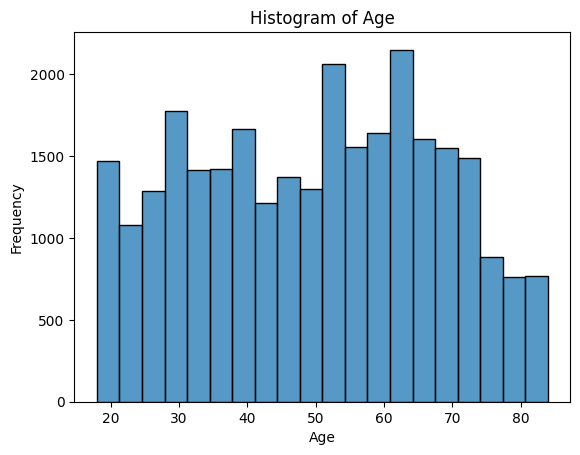

In [16]:
sns.histplot(cleaned_data['age'], bins=20)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [17]:

print(cleaned_data.shape)
print(cleaned_data.columns)

(28451, 13)
Index(['house_family_person_id', 'diabetes', 'age', 'smoker', 'sex',
       'coronary_heart_disease', 'weight', 'bmi', 'height', 'hypertension',
       'heart_condition', 'cancer', 'family_history_diabetes'],
      dtype='object')


In [18]:
print(cleaned_data.isnull().sum())

house_family_person_id     0
diabetes                   0
age                        0
smoker                     0
sex                        0
coronary_heart_disease     0
weight                     0
bmi                        0
height                     0
hypertension               0
heart_condition            0
cancer                     0
family_history_diabetes    0
dtype: int64


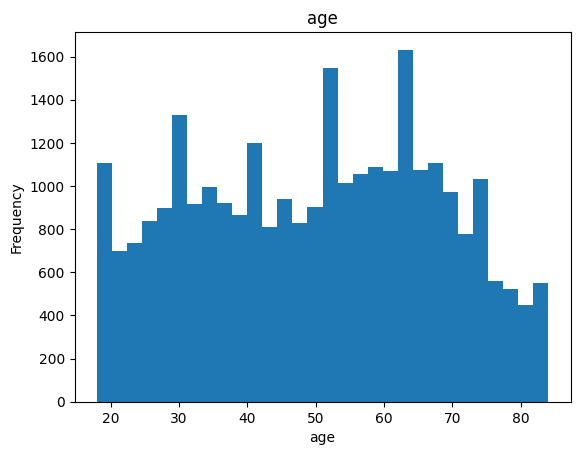

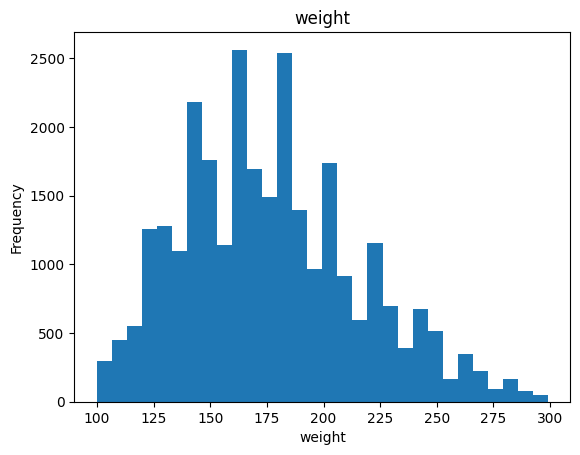

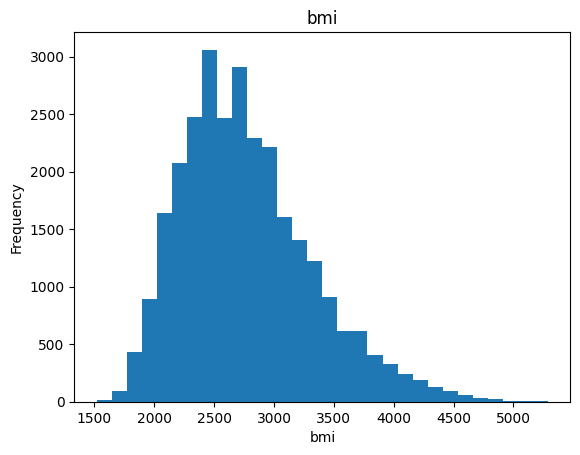

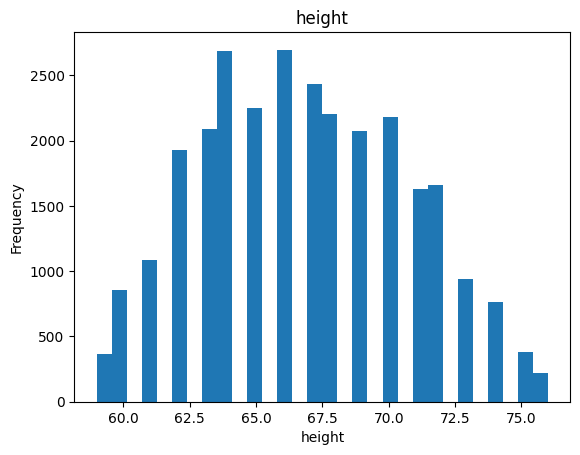

In [19]:
#查看数值型变量的分布。
numerical_cols = ['age', 'weight', 'bmi', 'height']
for col in numerical_cols:
    plt.hist(cleaned_data[col], bins=30)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

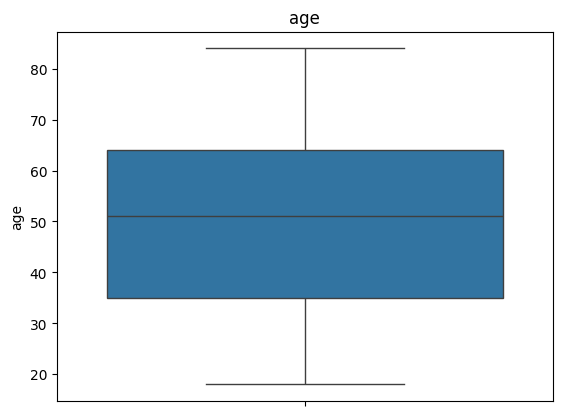

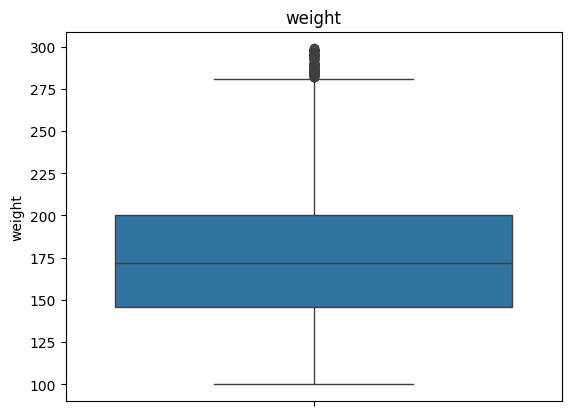

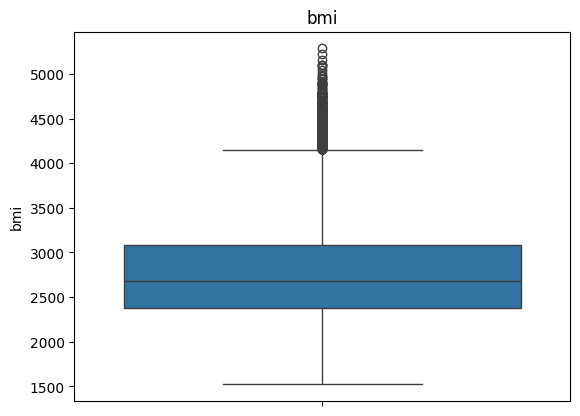

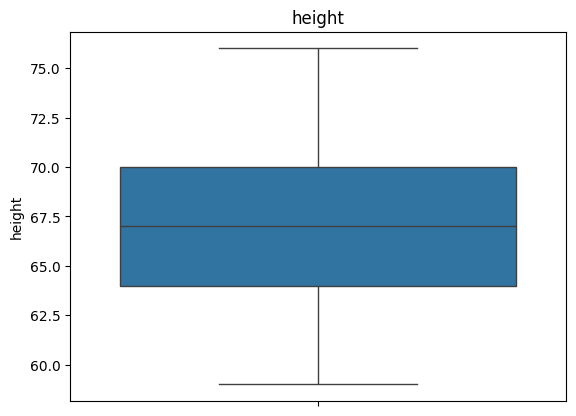

In [20]:
#查看数值型变量的四分位数和异常值。
for col in numerical_cols:
    sns.boxplot(y=cleaned_data[col])
    plt.title(col)
    plt.show()

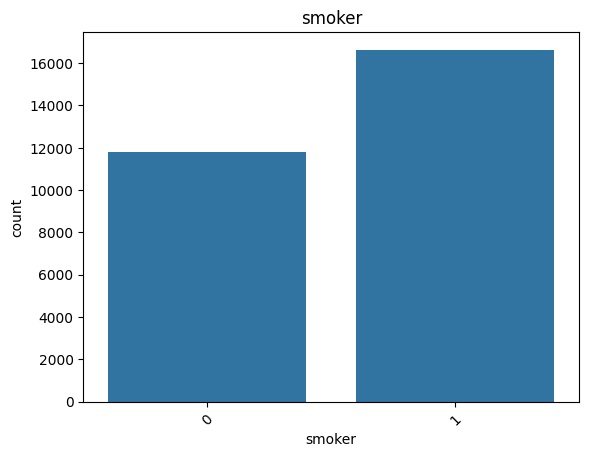

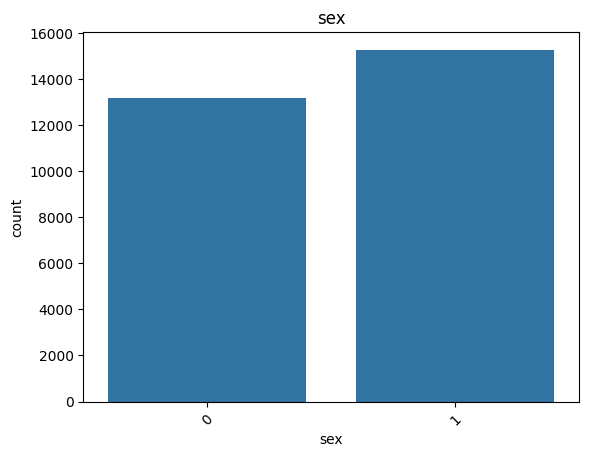

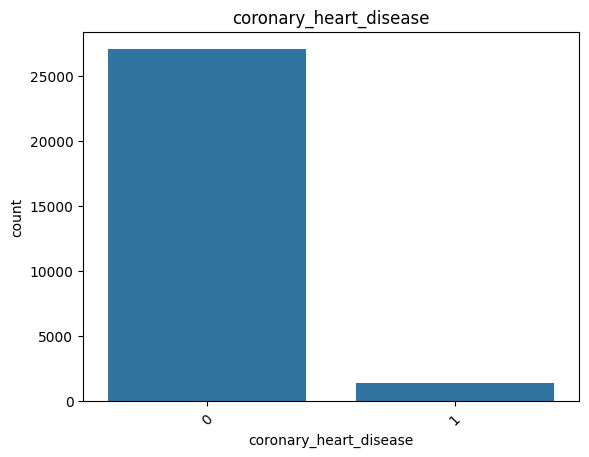

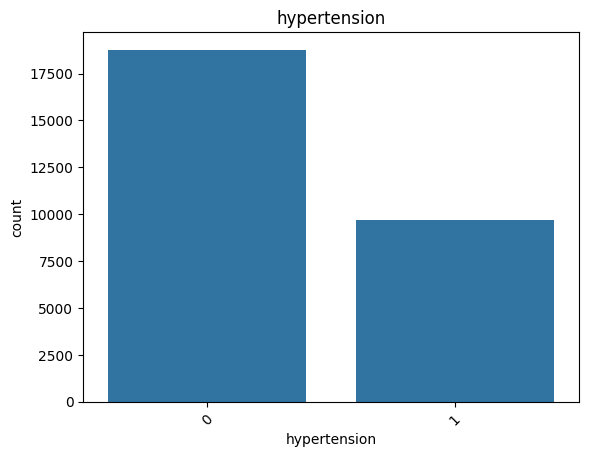

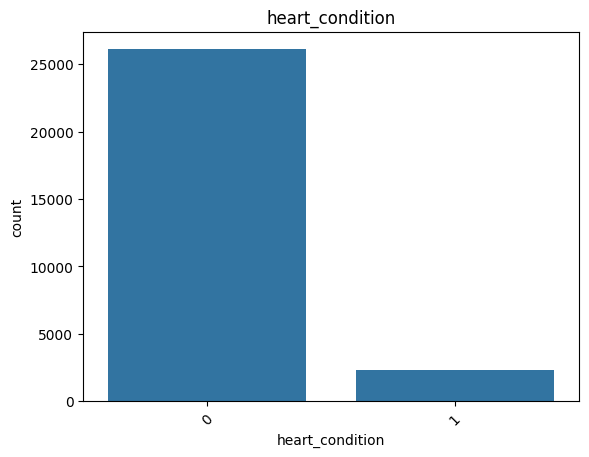

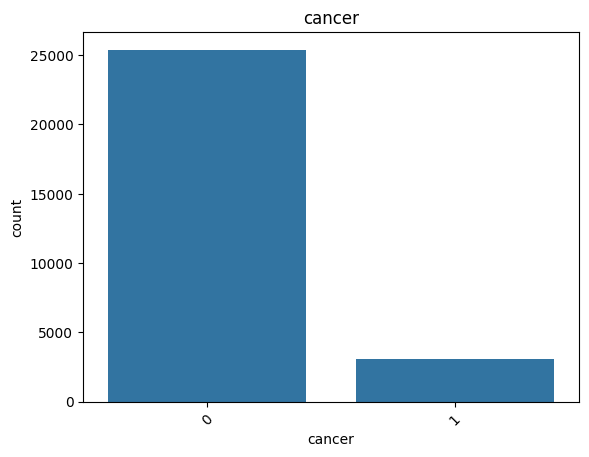

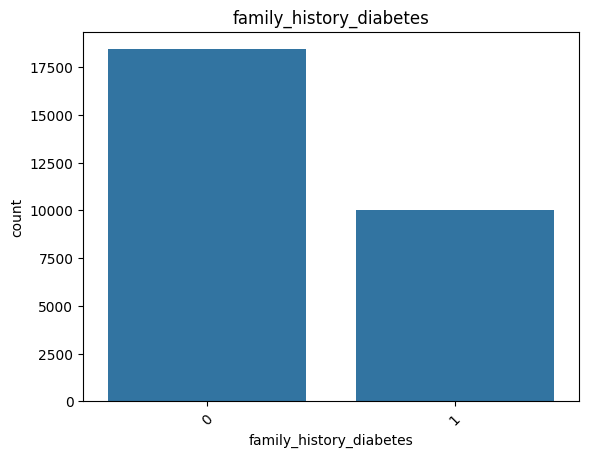

In [21]:
#查看分类变量的分布。
categorical_cols = ['smoker', 'sex', 'coronary_heart_disease', 'hypertension', 'heart_condition', 'cancer', 'family_history_diabetes']
for col in categorical_cols:
    sns.countplot(x=cleaned_data[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

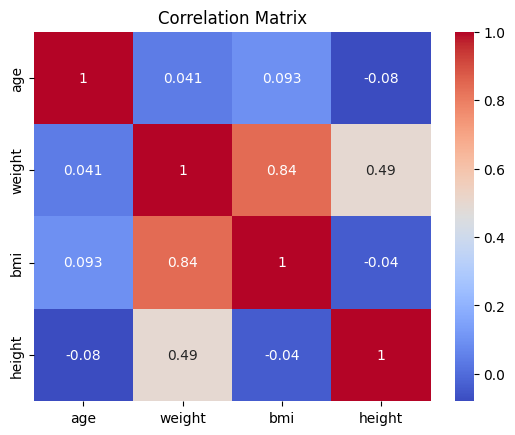

In [22]:
#对于数值型变量，可以计算相关性矩阵并可视化。
corr_matrix = cleaned_data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

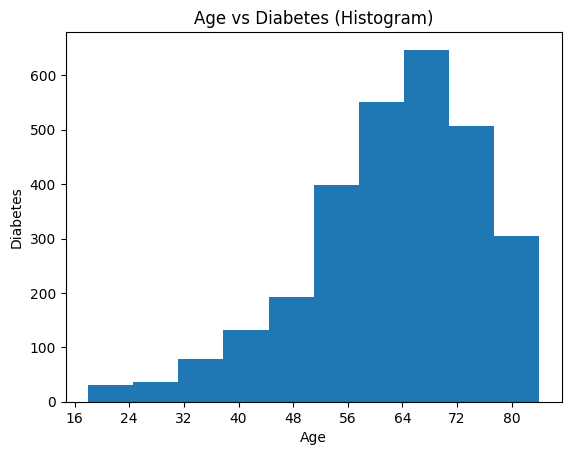

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# 假设cleaned_data是你的数据集
age = cleaned_data['age']
diabetes = cleaned_data['diabetes']

# 绘制直方图
plt.hist(age, bins=10, weights=diabetes)
plt.xlabel('Age')
plt.ylabel('Diabetes')
plt.title('Age vs Diabetes (Histogram)')

# 设置x轴刻度
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=10))

plt.show()

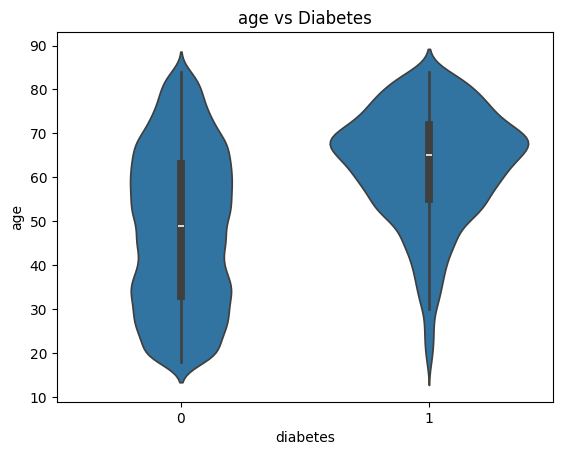

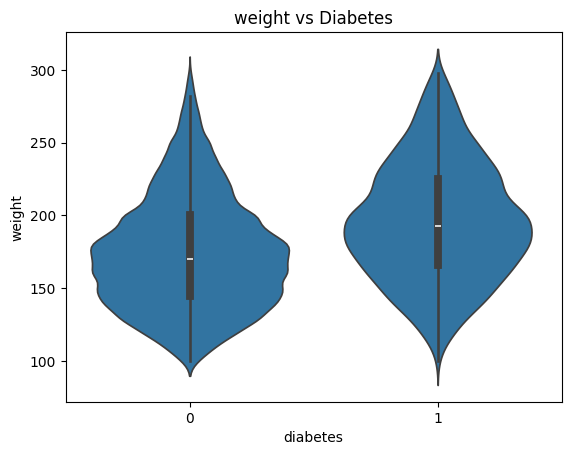

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# 选择要分析的变量
variables = ['age', 'weight', 'bmi', 'height']

# 绘制小提琴图
for var in variables:
    sns.violinplot(x='diabetes', y=var, data=cleaned_data)
    plt.title(f'{var} vs Diabetes')
    plt.show()

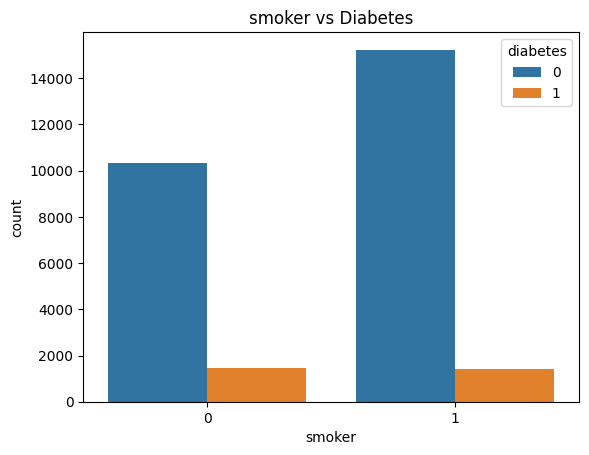

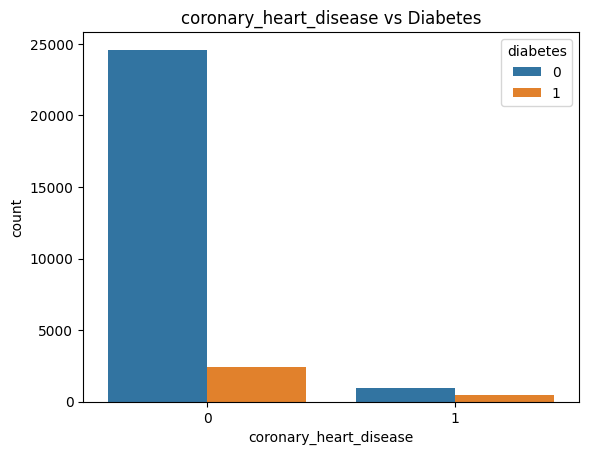

In [37]:
#import seaborn as sns
#import matplotlib.pyplot as plt
# 列出其他分类变量名，例如['sex', 'coronary_heart_disease', 'hypertension']
categorical_vars = ['smoker', 'sex', 'coronary_heart_disease', 'hypertension']

for var in categorical_vars:
    plt.figure()
    sns.countplot(x=var, hue='diabetes', data=cleaned_data)
    plt.title(f'{var} vs Diabetes')
    plt.show()